In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#DATA PREPROCESSING
#loading the dataset
news_dataset=pd.read_csv('train-2.csv',error_bad_lines=False, engine="python")

<ipython-input-9-850510d66668>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  news_dataset=pd.read_csv('train-2.csv',error_bad_lines=False, engine="python")
Skipping line 196: unexpected end of data


In [ ]:
news_dataset.shape

(194, 5)

In [ ]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news_dataset.isnull().sum()

id         0
title      4
author    20
text       1
label      0
dtype: int64

In [ ]:
#replacing null values with empty string
news_dataset=news_dataset.fillna('')

In [ ]:
#merge author and news title
news_dataset['content']=news_dataset['author']+ ' ' +news_dataset['title']
print(news_dataset['content'])

0      Darrell Lucus House Dem Aide: We Didn’t Even S...
1      Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2      Consortiumnews.com Why the Truth Might Get You...
3      Jessica Purkiss 15 Civilians Killed In Single ...
4      Howard Portnoy Iranian woman jailed for fictio...
                             ...                        
189    BareNakedIslam UK citizens and war heroes get ...
190    IWB After Vets Fight War, Feds Demand Money Ba...
191    Robert Draper Mr. Trump’s Wild Ride - The New ...
192    DSG Here Is How FBI Director Comey BAMBOOZLED ...
193    Twain Yobra 20 Foods That Naturally Unclog Art...
Name: content, Length: 194, dtype: object


In [ ]:
#separate data and labels
X= news_dataset.drop(columns='label', axis=1)
Y=news_dataset['label']

In [ ]:
print(X)
print(Y)

      id                                              title  \
0      0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1      1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2      2                  Why the Truth Might Get You Fired   
3      3  15 Civilians Killed In Single US Airstrike Hav...   
4      4  Iranian woman jailed for fictional unpublished...   
..   ...                                                ...   
189  189  UK citizens and war heroes get cheap pre-fab h...   
190  190  After Vets Fight War, Feds Demand Money Back… ...   
191  191         Mr. Trump’s Wild Ride - The New York Times   
192  192  Here Is How FBI Director Comey BAMBOOZLED The ...   
193  193  20 Foods That Naturally Unclog Arteries and Pr...   

                 author                                               text  \
0         Darrell Lucus  House Dem Aide: We Didn’t Even See Comey’s Let...   
1       Daniel J. Flynn  Ever get the feeling your life circles the rou...   
2    Cons

# STEMMING the process of reducing a word to its root words

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]' , ' ' , content)
  stemmed_content= stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [ ]:
news_dataset['content']=news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0      darrel lucu hous dem aid even see comey letter...
1      daniel j flynn flynn hillari clinton big woman...
2                 consortiumnew com truth might get fire
3      jessica purkiss civilian kill singl us airstri...
4      howard portnoy iranian woman jail fiction unpu...
                             ...                        
189    barenakedislam uk citizen war hero get cheap p...
190    iwb vet fight war fed demand money back illeg ...
191       robert draper mr trump wild ride new york time
192    dsg fbi director comey bamboozl doj congress c...
193    twain yobra food natur unclog arteri prevent h...
Name: content, Length: 194, dtype: object


In [ ]:
#separate the data and label
X = news_dataset['content'].values
Y= news_dataset['label'].values
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire'
 'jessica purkiss civilian kill singl us airstrik identifi'
 'howard portnoy iranian woman jail fiction unpublish stori woman stone death adulteri'
 'daniel nussbaum jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart'
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight'
 'alissa j rubin beno hamon win french socialist parti presidenti nomin new york time'
 'excerpt draft script donald trump q ampa black church pastor new york time'
 'megan twohey scott shane back channel plan ukrain russia courtesi trump associ new york time'
 'aaron klein obama organ action partner soro link indivis disrupt trump agenda'
 'chri tomlinson bbc comedi sketch real housew isi caus outrag'
 'amando flavio russian research discov secret nazi militari base

In [ ]:
print(Y)

[1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0
 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1
 0 1 0 0 1 1 0 1 1]


In [ ]:
Y.shape

(194,)

In [ ]:
#converting textual data to numerical data
vectorizer=TfidfVectorizer()
vectorizer.fit(X)
X=vectorizer.transform(X)
print(X)

  (0, 1189)	0.28701827046120976
  (0, 1013)	0.28701827046120976
  (0, 694)	0.309509028881756
  (0, 668)	0.28701827046120976
  (0, 592)	0.25868326587166335
  (0, 533)	0.22607930656968184
  (0, 376)	0.28701827046120976
  (0, 295)	0.309509028881756
  (0, 281)	0.309509028881756
  (0, 235)	0.27106082341077437
  (0, 190)	0.309509028881756
  (0, 18)	0.309509028881756
  (1, 1264)	0.2989660022020372
  (1, 523)	0.22685652188879035
  (1, 430)	0.6827447496533754
  (1, 279)	0.3165662370496589
  (1, 221)	0.23175349180035795
  (1, 171)	0.3413723748266877
  (1, 145)	0.18214121624630047
  (1, 122)	0.2989660022020372
  (2, 1182)	0.41093445731461126
  (2, 741)	0.4431352910500033
  (2, 461)	0.38808760218841976
  (2, 423)	0.3703662045852579
  (2, 247)	0.4431352910500033
  :	:
  (191, 1255)	0.4213226045178547
  (191, 1180)	0.19899437511223927
  (191, 1152)	0.15617339089289334
  (191, 971)	0.4213226045178547
  (191, 962)	0.4213226045178547
  (191, 789)	0.15395241193421016
  (191, 771)	0.4213226045178547
  (1

In [ ]:
#splitting dataset into training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

# **TRAINING LOG REG MODEL**

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

# **EVALUATION**

In [ ]:
#ACCURACY SCORE
#training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
#ACCURACY SCORE
#test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy for training data: ',training_data_accuracy)

Accuracy for training data:  1.0


In [ ]:
print('Accuracy for test data: ',test_data_accuracy)

Accuracy for test data:  0.9230769230769231


# **MAKE A PREDICTIVE SYSTEM**

In [ ]:
X_new=X_test[0]

prediction=model.predict(X_new)
print(prediction)

if (prediction==0):
  print("news is real")
else:
  print("news is fake")

[0]
news is real


**VISUALIZATION**

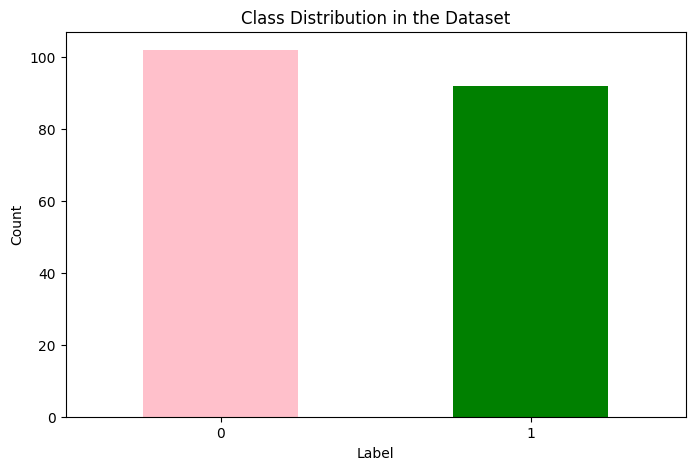

In [ ]:
# Data Visualization
# Visualize the class distribution in the dataset
plt.figure(figsize=(8, 5))
news_dataset['label'].value_counts().plot(kind='bar', color=['pink', 'green'])
plt.title('Class Distribution in the Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
fake_news = news_dataset[news_dataset['label'] == 1]['content'].values
fake_news_text = " ".join(fake_news)



In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_news_text)

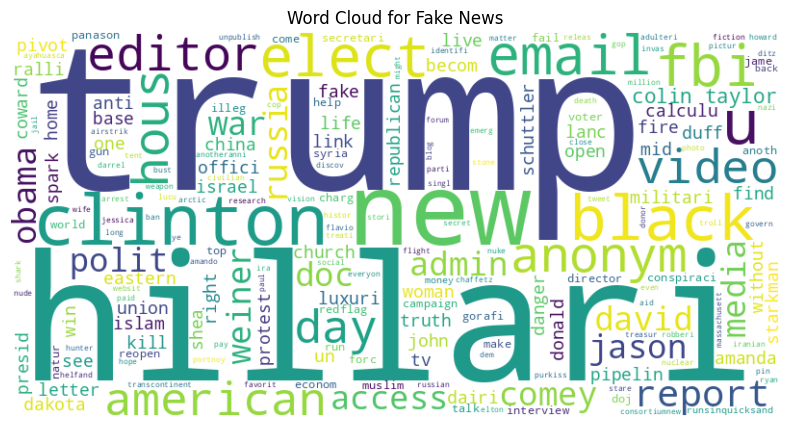

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()